# Weak Scalability Analysis


## 4.1

Function:

In [4]:
import numpy as np

def T(p, n, α, β): 
  # Returns computing time
  # Input Parameters:
  # 	p number of processors (PEs)
  # 	n problem size, i.e. number of array elements
  # 	a unit compute time (α alpha)
  # 	b unit communication time (β beta)
    q = np.log2(p)
    k = np.log2(n)
    if (p < n):
        return 2*β*q + α*(2*(n/p) - 1 + q) # derived like formula on 1_Introduction slide 19
    else:
        return 2*β*(k-1) + α*k  # set q = k-1


### Test Code

In [5]:
T(1024, 2**20,1,1)

2077.0

## 4.2



In [8]:


def S (p, n, α, β): 
    # Returns speedup
    # Input Parameters:
    # 	p number of processors (PEs)
    # 	n problem size, i.e., number of array elements
    # 	α unit compute time (alpha)
    # 	β unit communication time (beta)
    q = np.log2(p)
    k = np.log2(n)
    if (β > 0):
        γ = α/β
    else:
        return 0
    
    return γ*(2**k - 1) / (2*q + γ*(2**(k-q)-1+q))


### Test Code


In [9]:
S(1024, 2**20,1,1)

995.7977207977208

## 4.3

([<matplotlib.axis.XTick at 0x2cde3b3d520>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '8'),
  Text(4, 0, '16'),
  Text(5, 0, '32'),
  Text(6, 0, '64'),
  Text(7, 0, '126'),
  Text(8, 0, '256'),
  Text(9, 0, '512')])

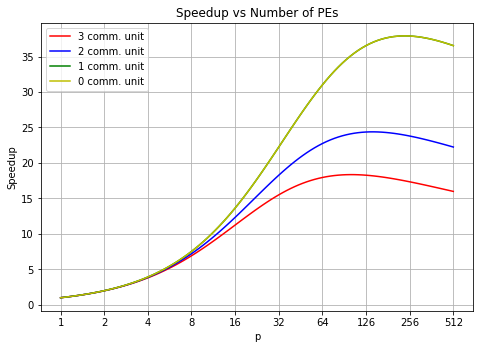

In [10]:
#more code
import matplotlib.pyplot as plt

n = 1024
α = 1
β_list = [0, 1, 2, 3]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

x = np.linspace(0, 9, 100)

y0 = [S(2**q, n, α, β_list[0]) for q in x]
y1 = [S(2**q, n, α, β_list[1]) for q in x]
y2 = [S(2**q, n, α, β_list[2]) for q in x]
y3 = [S(2**q, n, α, β_list[3]) for q in x]

# Plot Speedup vs # of processors for comm. costs 3, 2, and 1 
# (using MATLAB like interface)
plt.plot(x, y3, '-r', label = "3 comm. unit")
plt.plot(x, y2, '-b', label = "2 comm. unit")
plt.plot(x, y1, '-g', label = "1 comm. unit")
plt.plot(x, y1, '-y', label = "0 comm. unit")
plt.ylabel("Speedup")
plt.xlabel("p")
plt.legend()
plt.title("Speedup vs Number of PEs")
plt.grid(True)
# set xtick positions and labels
plt.xticks([0,1,2,3,4,5,6,7,8,9], 
        ['1','2','4','8','16','32','64','126','256','512'])